# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [3]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

2024-08-05 14:55:01.523708: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/supermanritz/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# Your code here
print(x_train.data.shape)
print(y_train.data.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
flattened_x_train = x_train.flatten().reshape( 50000 , 3072 )
flattened_x_test = x_test.flatten().reshape( 10000 , 3072 )

In [6]:
print(flattened_x_test.shape)
print(flattened_x_train.shape)

(10000, 3072)
(50000, 3072)


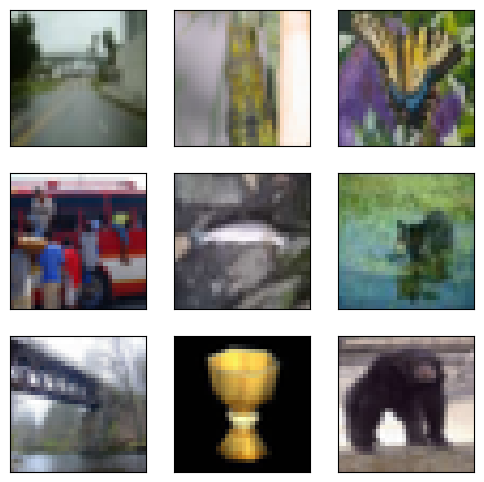

In [7]:
import numpy as np
import matplotlib.pyplot as plt

random_indices = np.random.choice(len(x_train) , 9 , replace=False)

fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[random_indices[i]], interpolation='nearest')


    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


In [8]:
len( set( list( np.concatenate( y_train ) ) ) )

100

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [9]:
# Your code here
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


y_coded = to_categorical( y_train , 100 )


x_scaled = x_train / 255.0

X_train , X_test , Y_train , Y_test = train_test_split(x_scaled , y_coded , test_size=0.2 , random_state=42)




## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , InputLayer

# Your code here
model = Sequential()

model.add( InputLayer(shape=( 32 , 32 , 3)) )

model.add( Conv2D( filters=32 , kernel_size= ( 3 , 3 ) , padding='same' , activation='relu' ) )

model.add( MaxPooling2D( pool_size=( 2 , 2 ) , strides=2  ) )

model.add( Conv2D( filters=64 , kernel_size= ( 3 , 3 ) , padding='same' , activation='relu' ) )

model.add( MaxPooling2D( pool_size=( 2 , 2 ) , strides=2 ) )

model.add( Conv2D( filters=128 , kernel_size= ( 3 , 3 ) , padding='same' , activation='relu' ) )

model.add( Flatten())

model.add( Dense( 100 , activation='softmax') )

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       819,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 912,548 (3.48 MB)

 Trainable params: 912,548 (3.48 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> categorical corssentropy makes the most sense since there are more than 2 labels
- <b>Optimizer:</b> Adam has been <a href='https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/'>shown</a> to have better accuracy

In [11]:
from keras import optimizers

# Your code here
model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer=optimizers.Adam(learning_rate=0.001), # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [12]:
# Your code here
for_plot = model.fit( 
                        X_train , 
                        Y_train , 
                        epochs=15 , 
                        batch_size=32 , 
                        validation_split=0.25
                        )

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.0960 - loss: 4.0406 - val_accuracy: 0.2285 - val_loss: 3.2075
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 76ms/step - accuracy: 0.2829 - loss: 2.9172 - val_accuracy: 0.3021 - val_loss: 2.8658
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.3999 - loss: 2.3731 - val_accuracy: 0.3409 - val_loss: 2.7399
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.5057 - loss: 1.8893 - val_accuracy: 0.3449 - val_loss: 2.7745
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.6158 - loss: 1.4143 - val_accuracy: 0.3436 - val_loss: 3.0311
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.7218 - loss: 1.0129 - val_accuracy: 0.3345 - val_loss: 3.4309
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.8151 - loss: 0.6567 - val_accuracy: 0.3171 - val_loss: 3.9063
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 62ms/step - accuracy: 0.8848 - loss: 0.4066 - 

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [13]:
# Your code here

loss , accuracy = model.evaluate( X_test , Y_test )

print(f'Accuracy: {accuracy*100:.2f}%')

print(f'Other metric - Loss: {loss: .2f}')
print("Loss metric chosen because it directly compares the model's prediction capability by comparing the predicted output vs. the actual label.")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.3129 - loss: 8.3596
Accuracy: 30.52%
Other metric - Loss:  8.44
Loss metric chosen because it directly compares the model's prediction capability by comparing the predicted output vs. the actual label.


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

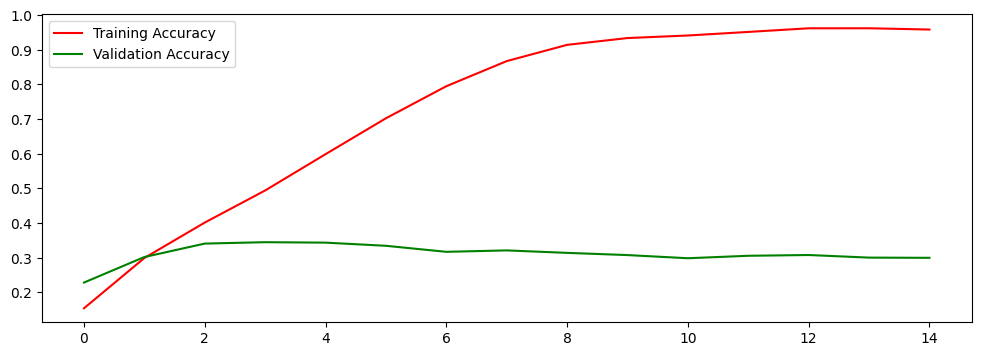

In [14]:
# Your code here
plt.figure(figsize=(12,4))
plt.plot(for_plot.history['accuracy'] , label="Training Accuracy" , color='r')
plt.plot(for_plot.history['val_accuracy'] , label="Validation Accuracy" , color='g')
plt.legend()
plt.show()

In [15]:
predictions_y = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [16]:
import numpy as np

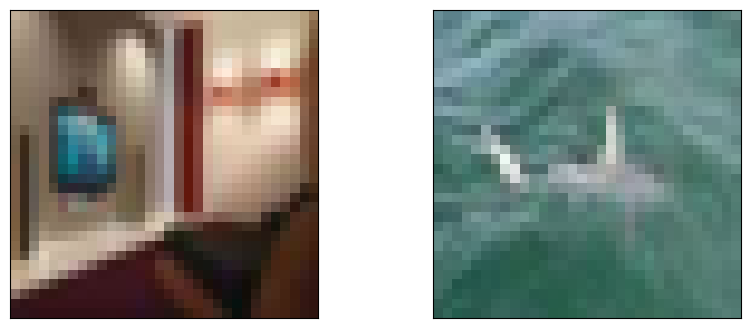

In [29]:

true_classes = np.argmax(Y_test)
predicted_classes = np.argmax(predictions_y , axis=1)

correct_class_ind = np.where(true_classes == predicted_classes)
incorrect_class_ind = np.where(true_classes != predicted_classes)

fig , (ax0 , ax1) = plt.subplots(1 ,2 , figsize=(10 , 4))
ax0.imshow(np.squeeze(X_test[np.random.choice(len(correct_class_ind[0]) , 1)]), interpolation='nearest')
ax1.imshow(np.squeeze(X_test[np.random.choice(len(incorrect_class_ind[0]) , 1)]),  interpolation='nearest')
ax0.set_xticks([])
ax0.set_yticks([])
ax1.set_xticks([])
ax1.set_yticks([])
plt.show()

<i> Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?</i>
<br>
- The plots show that the model may be overfit to the training data since the accuracy on the validation set is 1/3 the accuracy of the the training set

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

I chose to do a random search on the first 2 Convolution layers using keras tuner, a hyperparamter tuner. I cycled through different filter values [ 8 , 16 , 32 , 64 ]. <br>
I chose this technique because of prior experience with doing GridSearchCV in the context of decision tree analysis and having success with it in the past.<br>
This technique did require tuning and I choice the values in my fileter list based on research and being divisible bytewise. Research indicated that filters for 2D images should be between 32 and 255, but I cut myself off at 64 due to lack of resources to be able to handle the computational load ( I don't have a dedicated GPU on my machine ).

In [70]:
# Your code here
import keras.layers as layers
from keras import metrics

def build_model(hp):

    model_enhanced = Sequential()

    model_enhanced.add( InputLayer(shape=( 32 , 32 , 3)) )

    model_enhanced.add( Conv2D( hp.Choice('filters' , [ 8 , 16 , 32 , 64 ] ), kernel_size= ( 3 , 3 ) , padding='same' , activation='relu' ) )

    model_enhanced.add( MaxPooling2D( pool_size=( 2 , 2 ) , strides=2  ) )

    model_enhanced.add( Conv2D( hp.Choice('filters' , [ 8 , 16 , 32 , 64] ), kernel_size= ( 3 , 3 ) , padding='same' , activation='relu' ) )

    model_enhanced.add( MaxPooling2D( pool_size=( 2 , 2 ) , strides=2 ) )

    model_enhanced.add( Conv2D( filters=128 , kernel_size= ( 3 , 3 ) , padding='same' , activation='relu' ) )

    model_enhanced.add( Flatten())

    model_enhanced.add( Dense( 100 , activation='softmax') )

    model_enhanced.compile(
                            loss='categorical_crossentropy', # Loss function
                            optimizer='sgd', # Optimizer
                            metrics=['accuracy' , metrics.CategoricalAccuracy()] # Metrics to evaluate the model
                        )


    return model_enhanced

In [75]:
#import keras_tuner

tuner = keras_tuner.RandomSearch(
    build_model , 
    objective='val_loss' ,
    max_trials=10
)


Reloading Tuner from ./untitled_project/tuner0.json


In [76]:
tuner.search(X_train , Y_train , epochs=10 , validation_split=0.25)
best_model = tuner.get_best_models()[0]

In [77]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       819,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 840,628 (3.21 MB)

 Trainable params: 840,628 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
best_model.get_config()

{'name': 'sequential',
 'trainable': True,
 'dtype': 'float32',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    '

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [81]:
# Your code here
loss , accuracy , categorical_accuracy = best_model.evaluate(X_test , Y_test)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Categorical Accuracy: {categorical_accuracy*100:.2f}%')

print(f'Loss: {loss: .2f}')
#while accuracy decreased, the Loss metric decreased by a significant factor (50%) relative to the original model

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2737 - categorical_accuracy: 0.2737 - loss: 3.0825
Accuracy: 27.35%
Categorical Accuracy: 27.35%
Loss:  3.10


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


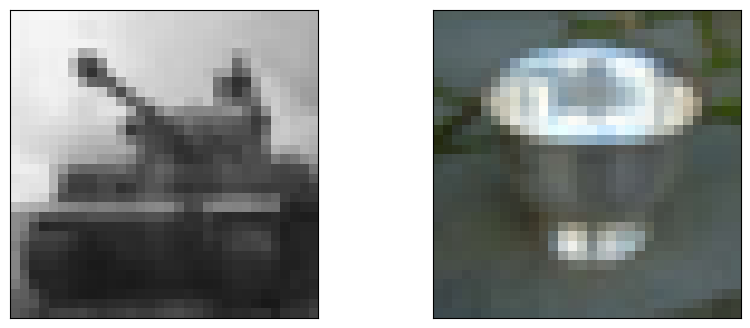

In [82]:
pred_enchanced_y = best_model.predict(X_test)

true_classes = np.argmax(Y_test)
predicted_classes = np.argmax(pred_enchanced_y , axis=1)

correct_class_ind = np.where(true_classes == predicted_classes)
incorrect_class_ind = np.where(true_classes != predicted_classes)

fig , (ax0 , ax1) = plt.subplots(1 ,2 , figsize=(10 , 4))
ax0.imshow(np.squeeze(X_test[np.random.choice(len(correct_class_ind[0]) , 1)]), interpolation='nearest')
ax1.imshow(np.squeeze(X_test[np.random.choice(len(incorrect_class_ind[0]) , 1)]),  interpolation='nearest')
ax0.set_xticks([])
ax0.set_yticks([])
ax1.set_xticks([])
ax1.set_yticks([])
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

<H3>Discussion</H3>
<ul>
<li> The model's accuracy appears to actually have deteriorated </li>
<li> This could be because changing the chosen hyperparameter alone without consideration of effects and impacts to other layers </li>
<li> There is definitely room for improvement. Accuracy scores are still substantially low against the validation set. </li>
<li> I would consider adding in more layers (convolution , normalizations , pooling) similar to the ResNet50 model </li>
</ul>

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.